# Create Las Vegas Reviews Dataset

#### Imports

In [1]:
import numpy as np
import pandas as pd
from langid.langid import LanguageIdentifier, model

import matplotlib.pyplot as plt
import matplotlib.colors as mc
import colorsys
import seaborn as sns

%matplotlib inline

### Read JSON Data

In [2]:
review_chunks = pd.read_json('../data/old/yelp_reviews.json', lines=True, orient='records', chunksize=5000)
review_list = []
for chunk in review_chunks:
    review_list.append(chunk)
reviews = pd.concat(review_list)

In [3]:
reviews.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [4]:
business_chunks = pd.read_json('../data/old/yelp_business.json', lines=True, orient='records', chunksize=5000)
business_list = []
for chunk in business_chunks:
    business_list.append(chunk)
business = pd.concat(business_list)

In [5]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,f9NumwFMBDn751xgFiRbNA,The Range At Lake Norman,10913 Bailey Rd,Cornelius,NC,28031,35.462724,-80.852612,3.5,36,1,"{'BusinessAcceptsCreditCards': 'True', 'BikePa...","Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...","{'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'..."
1,Yzvjg0SayhoZgCljUJRF9Q,"Carlos Santo, NMD","8880 E Via Linda, Ste 107",Scottsdale,AZ,85258,33.569404,-111.890264,5.0,4,1,"{'GoodForKids': 'True', 'ByAppointmentOnly': '...","Health & Medical, Fitness & Instruction, Yoga,...",None
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,None,"Pets, Pet Services, Pet Groomers",None
3,6OAZjbxqM5ol29BuHsil3w,Nevada House of Hose,1015 Sharp Cir,North Las Vegas,NV,89030,36.219728,-115.127725,2.5,3,0,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Hardware Stores, Home Services, Building Suppl...","{'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ..."
4,51M2Kk903DFYI6gnB5I6SQ,USE MY GUY SERVICES LLC,4827 E Downing Cir,Mesa,AZ,85205,33.428065,-111.726648,4.5,26,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","Home Services, Plumbing, Electricians, Handyma...","{'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '..."


In [6]:
business.categories.fillna('NA', inplace=True)

### Find Las Vegas Restaurant Reviews

In [7]:
restaurants = business[business['categories'].str.contains('Restaurant')]

In [8]:
lv_restaurants = restaurants[restaurants.city.str.contains('Las Vegas')]

In [9]:
lv_restaurants.shape

(7310, 14)

In [10]:
lv_reviews = reviews.set_index('business_id').loc[lv_restaurants.business_id.tolist()]

In [11]:
lv_reviews.reset_index(inplace=True)

In [12]:
# Add word_count column to reviews
lv_reviews['word_count'] = lv_reviews.text.apply(lambda x : len(x.split(' ')))

In [13]:
lv_reviews.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date,word_count
0,fnZrZlqW1Z8iWgTVDfv_MA,WUAt5-krh075Ie44np8Hew,YDkC5VVT8s9NlIZtAr8NUA,5,0,0,0,So why would I be giving a Fast Food chain loc...,2010-11-27 09:33:34,144
1,fnZrZlqW1Z8iWgTVDfv_MA,S9vIs-je49jqbhpWSQ8yHg,mxtalrN7VHVQwGjv8ln5yg,2,0,0,0,I come here bout 3x's a mo. & I just can't do ...,2016-03-19 09:03:09,98
2,fnZrZlqW1Z8iWgTVDfv_MA,i2Soid_X8XsSTyIrPOst6g,xammeA3ftpFoAN13v5Blyg,1,2,0,0,WORST experience EVER!!!!! never have i ate an...,2015-04-02 06:14:51,238
3,fnZrZlqW1Z8iWgTVDfv_MA,uDYGaAOUgo7SLuH5nUZs3w,gQhFacMGI41mfVXqw1E7bQ,4,0,0,0,Hot fresh food usually. Staff seems to turn o...,2014-08-14 23:00:34,79
4,fnZrZlqW1Z8iWgTVDfv_MA,Xg7HuBvuZHTBog1G_2Wk0w,0PXhJMztE3ijzQPjiwPERg,3,0,0,0,Beer battered cod fish seems really rubbery. I...,2015-03-23 02:10:52,19


In [14]:
(lv_reviews.stars.value_counts() / lv_reviews.stars.value_counts().sum()).sort_index()

1    0.124015
2    0.084337
3    0.118725
4    0.228404
5    0.444518
Name: stars, dtype: float64

### Select only English Reviews

In [15]:
langlst= []

In [16]:
identifier = LanguageIdentifier.from_modelstring(model, norm_probs=True)

for i, text in enumerate(lv_reviews.text):
    lang = identifier.classify(text)[0]
    langlst.append(lang)

In [17]:
len(langlst), lv_reviews.shape

(1535890, (1535890, 10))

In [18]:
lv_reviews['language'] = np.array(langlst)

In [19]:
eng_reviews = lv_reviews[lv_reviews.language == 'en']

### Save New Dataset

In [21]:
lv_reviews.to_pickle('../data/las_vegas_reviews.pkl')

In [22]:
eng_reviews.to_pickle('../data/english_reviews.pkl')

# Basic Exploratory Data Analysis

In [23]:
def lighten_color(color, amount=0.5):
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

''

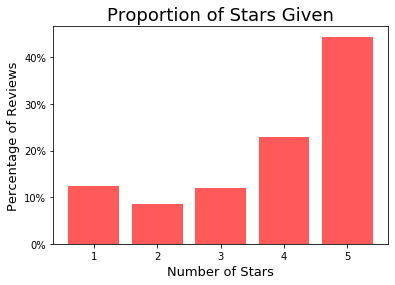

In [24]:
# Proportions of Stars Graph

fig, ax = plt.subplots()
#sns.distplot(reviews.stars, ax=ax, kde=False)#, bins=5, )

#l = len(reviews.stars)
#ax.hist(reviews.stars, weights=np.ones(l) / l, align='mid')
labels, counts = np.unique(eng_reviews.stars, return_counts=True)
percents = counts / counts.sum()

plt.bar(labels, percents, align='center', color=lighten_color('r',0.65))
plt.gca().set_xticks([1,2,3,4,5])


#ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('Number of Stars', fontsize=13)
ax.set_ylabel('Percentage of Reviews', fontsize=13)
ax.set_title('Proportion of Stars Given', fontsize=18)

vals = ax.get_yticks()
vals = np.append(vals, [0.6])
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

#plt.save_fig('../img/stars_ratio.png')
;

Text(0.5, 1.0, "Review's Funny Count vs Stars")

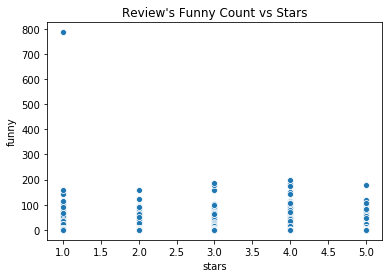

In [25]:
fig, ax = plt.subplots()

sns.scatterplot(eng_reviews.stars, eng_reviews.funny, ax=ax)
ax.set_title("Review's Funny Count vs Stars")

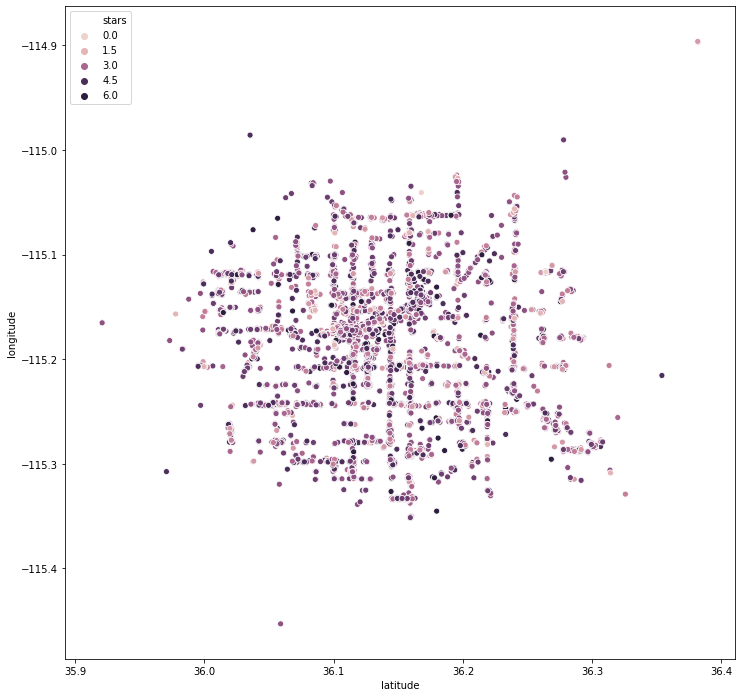

In [28]:
# Graph of Restaurant Locations
fig, ax = plt.subplots(figsize=(12,12))
sns.scatterplot(lv_restaurants.latitude, lv_restaurants.longitude, hue=lv_restaurants.stars, ax=ax)

In [29]:
# Restaurant with most reviews 
lv_restaurants[lv_restaurants.review_count == 10129]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
81545,RESDUcs7fIiihp38-d6_6g,Bacchanal Buffet,3570 S Las Vegas Blvd,Las Vegas,NV,89109,36.115929,-115.176238,4.0,10129,1,"{'BikeParking': 'False', 'OutdoorSeating': 'Fa...","Sandwiches, Breakfast & Brunch, Food, Restaura...","{'Monday': '7:30-22:0', 'Tuesday': '7:30-22:0'..."


In [30]:
# Reviews for 'Bacchanal Buffet'
bbuffet = eng_reviews[eng_reviews.business_id == 'RESDUcs7fIiihp38-d6_6g']

In [31]:
bbuffet = bbuffet.set_index('date').sort_index()

In [32]:
bbuffet.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,word_count,language
date,,,,,,,,,,
2012-09-10 20:03:19,RESDUcs7fIiihp38-d6_6g,8dCzY2F-KOS1MnjXZMS-fg,N3oNEwh0qgPqPP3Em6wJXw,4,31,9,21,"Spread, spread, spread is what makes the newly...",353,en
2012-09-11 23:09:25,RESDUcs7fIiihp38-d6_6g,dtHwAzhO72h4M5H04YXkfA,r5ggPC6OccLk6dDl5yqsJQ,5,7,1,2,The ladies and gentlemen at the front are read...,151,en
2012-09-12 02:10:10,RESDUcs7fIiihp38-d6_6g,UNoZuF-sNWfdeOvCI2wN_Q,sdD7FsJOmalb1JQpgqKJhQ,4,8,4,4,WOW!! Very nice!! 17 million dollar newly reno...,60,en
2012-09-12 05:27:12,RESDUcs7fIiihp38-d6_6g,VdqmQY2JFBi2heeKT5MQpw,eh9iuzICK2tEJ4mM6KSqDA,5,6,1,1,"Food is as good as it gets, service is kinda c...",82,en
2012-09-12 06:41:00,RESDUcs7fIiihp38-d6_6g,ttOdVZqe0_ICdFIN0JDlTg,MaxlLd0HZmCtdZ3yJ9pyJQ,4,16,3,14,"Ladies and gentlemen, there is a new contender...",256,en


In [33]:
bbstars = bbuffet.stars.rolling(150).mean()[149:]

In [34]:
bbstars[:3]

date
2012-10-13 05:05:50    4.266667
2012-10-13 22:54:31    4.273333
2012-10-15 03:34:40    4.266667
Name: stars, dtype: float64

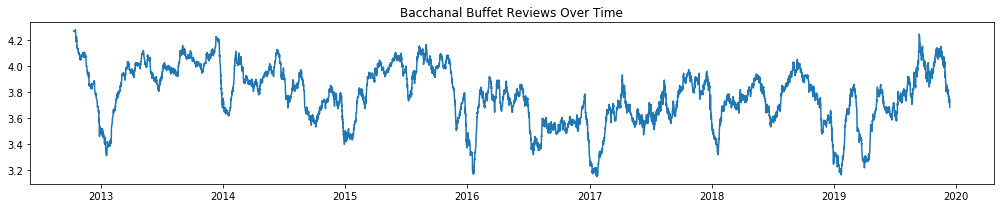

In [35]:
fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(bbstars.index, bbstars)
ax.set_title("Bacchanal Buffet Reviews Over Time")
plt.tight_layout()

In [36]:
lv_restaurants.name.value_counts()

Subway Restaurants                  116
McDonald's                           98
Taco Bell                            51
Panda Express                        50
Jack in the Box                      50
                                   ... 
Boulder Station Hotel And Casino      1
Basil Thai Fusion                     1
Sicily's Pizza                        1
Canyon Gate Country Club              1
Hawaiian Hale                         1
Name: name, Length: 5302, dtype: int64

In [37]:
subway_ids = np.array(lv_restaurants[lv_restaurants.name == 'Subway Restaurants'].business_id)

In [38]:
subway = eng_reviews.set_index('business_id').loc[subway_ids]

In [39]:
subway.shape

(2113, 10)

In [40]:
subway_stars = subway.set_index('date').sort_index()

In [41]:
sub_stars = subway_stars.stars.rolling(50).mean()[300:]

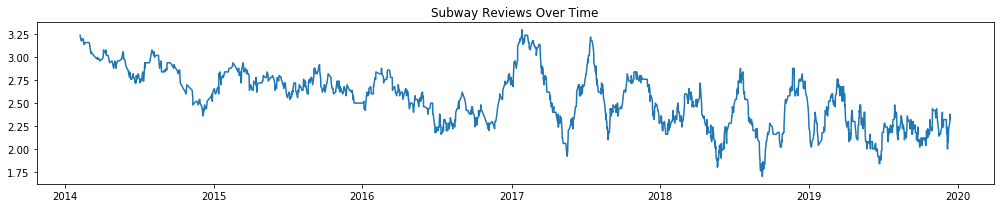

In [42]:
fig, ax = plt.subplots(1, figsize=(14, 3))
ax.plot(sub_stars.index, sub_stars)
ax.set_title("Subway Reviews Over Time")
plt.tight_layout()

In [43]:
eng_reviews.head()

,business_id,review_id,user_id,stars,useful,funny,cool,text,date,word_count,language
0,fnZrZlqW1Z8iWgTVDfv_MA,WUAt5-krh075Ie44np8Hew,YDkC5VVT8s9NlIZtAr8NUA,5,0,0,0,So why would I be giving a Fast Food chain loc...,2010-11-27 09:33:34,144,en
1,fnZrZlqW1Z8iWgTVDfv_MA,S9vIs-je49jqbhpWSQ8yHg,mxtalrN7VHVQwGjv8ln5yg,2,0,0,0,I come here bout 3x's a mo. & I just can't do ...,2016-03-19 09:03:09,98,en
2,fnZrZlqW1Z8iWgTVDfv_MA,i2Soid_X8XsSTyIrPOst6g,xammeA3ftpFoAN13v5Blyg,1,2,0,0,WORST experience EVER!!!!! never have i ate an...,2015-04-02 06:14:51,238,en
3,fnZrZlqW1Z8iWgTVDfv_MA,uDYGaAOUgo7SLuH5nUZs3w,gQhFacMGI41mfVXqw1E7bQ,4,0,0,0,Hot fresh food usually. Staff seems to turn o...,2014-08-14 23:00:34,79,en
4,fnZrZlqW1Z8iWgTVDfv_MA,Xg7HuBvuZHTBog1G_2Wk0w,0PXhJMztE3ijzQPjiwPERg,3,0,0,0,Beer battered cod fish seems really rubbery. I...,2015-03-23 02:10:52,19,en


In [44]:
word_count_5 = eng_reviews[eng_reviews.stars == 5].word_count
word_count_n5 = eng_reviews[eng_reviews.stars != 5].word_count

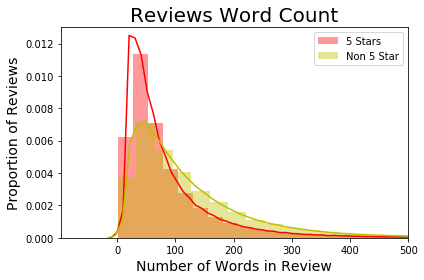

In [45]:
fig, ax = plt.subplots()#figsize=(11,6))

sns.distplot(word_count_5, ax=ax, color='r', label='5 Stars')

sns.distplot(word_count_n5, ax=ax, color='y', label='Non 5 Star')

ax.set_xlabel("Number of Words in Review",fontsize=14)
ax.set_ylabel("Proportion of Reviews",fontsize=14)
ax.set_title("Reviews Word Count", fontsize=20)
ax.set_xlim(right=500)
ax.set_ylim(0, 0.013)

ax.legend()
plt.tight_layout()
# plt.save_fig('../img/word_count_plot.png')

In [98]:
eng_reviews[eng_reviews.stars == 5].word_count.mean()

86.12193240037742

In [99]:
eng_reviews[eng_reviews.stars != 5].word_count.mean()

126.46890151234666